# Fashion-MNIST

In [0]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [2]:
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


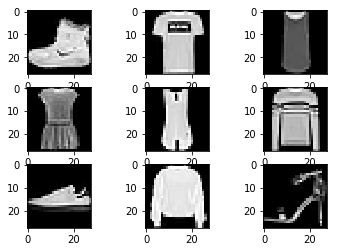

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

## Load dataset

In [0]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

### Prepare pixel data

In [0]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

### Define model

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	# model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

### Evaluate model

In [0]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

### Present results

In [0]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['acc'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
	pyplot.show()

In [0]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

### Complete example

In [0]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

In [0]:
# # evaluate a model using k-fold cross-validation
# def evaluate_model_1(dataX, dataY):
#     scores, histories = list(), list()
#     # define model
#     model = define_model()
#     # select rows for train and test
#     trainX, trainY, testX, testY = dataX[:50000], dataY[:50000], dataX[50000:], dataY[50000:]
#     # fit model
#     history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)#, steps_per_epoch=100, validation_steps=10)
#     # evaluate model
#     _, acc = model.evaluate(testX, testY, verbose=0)
#     print('> %.3f' % (acc * 100.0))
#     # append scores
#     scores.append(acc)
#     histories.append(history)

#     return scores, histories

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 255us/step - loss: 0.4596 - acc: 0.8342 - val_loss: 0.3674 - val_acc: 0.8714
Epoch 2/10
48000/48000 [==============================] - 11s 233us/step - loss: 0.2958 - acc: 0.8942 - val_loss: 0.3064 - val_acc: 0.8898
Epoch 3/10
48000/48000 [==============================] - 11s 233us/step - loss: 0.2511 - acc: 0.9096 - val_loss: 0.3009 - val_acc: 0.8878
Epoch 4/10
48000/48000 [==============================] - 11s 233us/step - loss: 0.2211 - acc: 0.9203 - val_loss: 0.2599 - val_acc: 0.9061
Epoch 5/10
48000/48000 [==============================] - 11s 232us/step - loss: 0.1965 - acc: 0.9274 - val_loss: 0.2637 - val_acc: 0.9024
Epoch 6/10
48000/48000 [==============================] - 11s 232us/step - loss: 0.1756 - acc: 0.9358 - val_loss: 0.2716 - val_acc: 0.9028
Epoch 7/10
48000/48000 [==============================] - 11s 231us/step - loss: 0.1562 - acc: 0.9427 - val_loss: 0.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


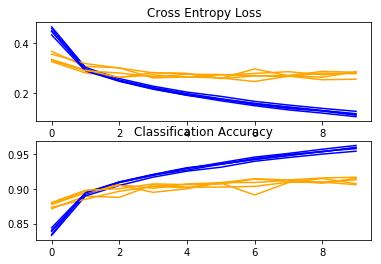

Accuracy: mean=91.192 std=0.425, n=5


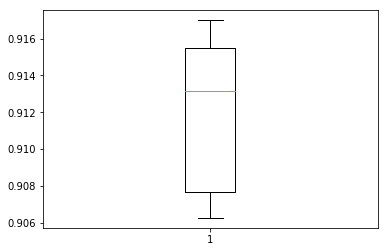

In [50]:
run_test_harness()